# HW1 Code Part (Investigation)

Group Member:
- Yunlin Tang a14664383
- Yong Liu a15126460
- Jian Jiao a14525939

## Set Up

In [1]:
# read the baby data
baby <- read.table('babies.txt', header=TRUE)
# split the dataset into two groups based on smoke value
smoke <- subset(baby, smoke==1)
non_smoke <- subset(baby, smoke==0)

## Method 1

Summarize numerically the two distributions of birth weight for babies born to women who smoked during their pregnancy and for babies born to women who did not smoke during their pregnancy.

In [2]:
# calculate the mean for two groups
mean(smoke$bwt)
mean(non_smoke$bwt)

[1] 114.1095

[1] 123.0472

In [3]:
# calculate the variance for two groups
var(smoke$bwt)
var(non_smoke$bwt)

[1] 327.5718

[1] 302.7144

In [4]:
# calculate the quantiles for smoking group
quantile(smoke$bwt)

0%  25%  50%  75% 100% 
  58  102  115  126  163

In [5]:
# calculate the quantiles for non-smoking group
quantile(non_smoke$bwt)

0%  25%  50%  75% 100% 
  55  113  123  134  176

In [6]:
# install package for kurtosis measurement
install.packages('moments')
library(moments)

Installing package into 'C:/Users/yunli/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yunli\AppData\Local\Temp\RtmpwV3xy5\downloaded_packages


In [7]:
# calculate the kurtosis for two groups
kurtosis(smoke$bwt)
kurtosis(non_smoke$bwt)

[1] 2.988032

[1] 4.03706

In [8]:
# calculate the skewness for two groups
skewness(smoke$bwt)
skewness(non_smoke$bwt)

[1] -0.03359498

[1] -0.1869841

Conclusion: Our result shows that there is a difference of 8.9 between the mean birth weight of babies of the smoked and non-smoked mother. The Lower Quartile of these two categories shows there is 11 ounces difference between the birth weight of babies of the smoked and non-smoked mother. These two statistics show the tendency of decrement of babies' birth weight if the mother smoked. There is not much difference between the Variance of two distributions, which shows both are in a similar degree of distribution. Values of Kurtosis shows that Non-Smoked distribution is more centralized.

## Method 2

Use graphical methods to compare the two distributions of birth weight.

#### Histogram

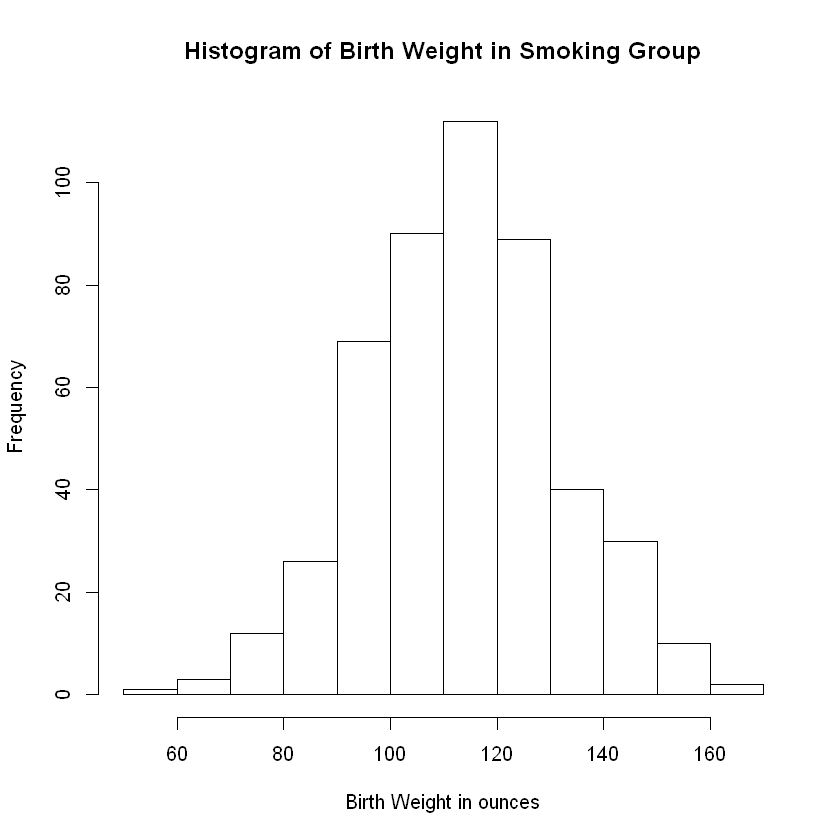

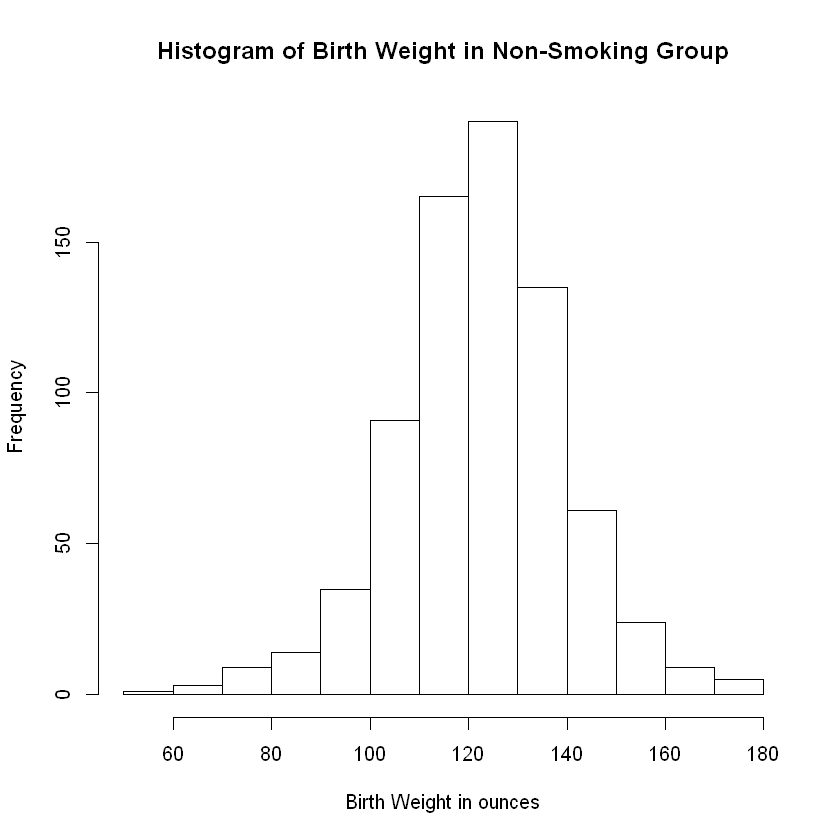

In [9]:
# histogram for smoke group
hist(smoke$bwt, main='Histogram of Birth Weight in Smoking Group',xlab='Birth Weight in ounces')

# histogram for non-smoke group
hist(non_smoke$bwt, main='Histogram of Birth Weight in Non-Smoking Group',xlab='Birth Weight in ounces')

In [10]:
# load the ggplot2 library
install.packages('ggplot2')
library(ggplot2)

Installing package into 'C:/Users/yunli/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yunli\AppData\Local\Temp\RtmpwV3xy5\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

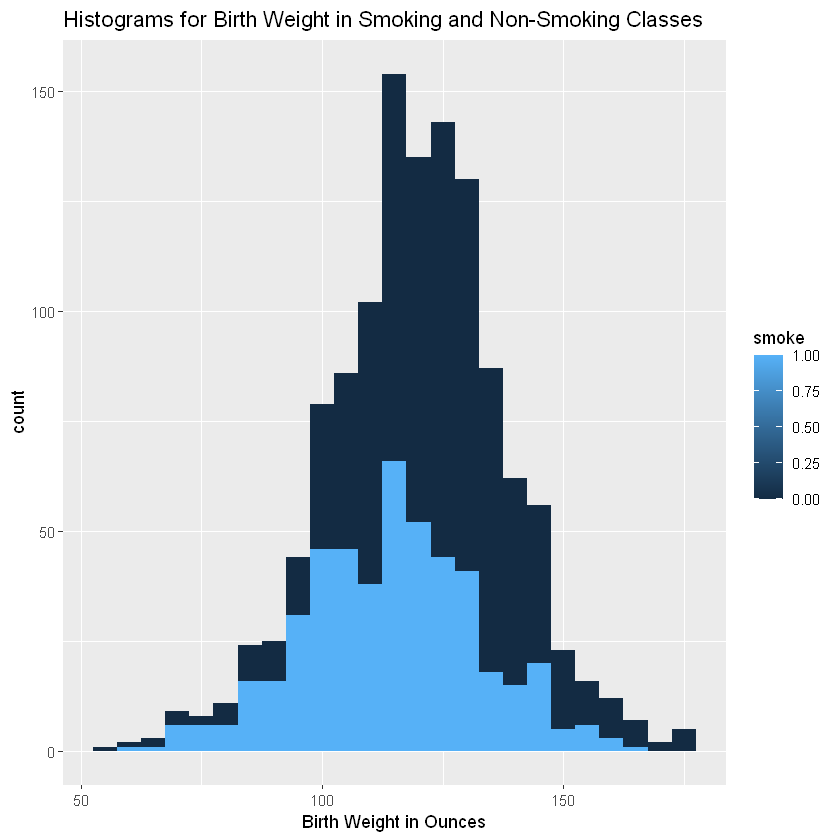

In [11]:
# extract the birth weight variable from each class
smoke_bwt <- smoke[c('bwt', 'smoke')]
non_smoke_bwt <- non_smoke[c('bwt', 'smoke')]

# combine them into one dataframe
comb <- rbind(smoke_bwt, non_smoke_bwt)

# put two histograms into one plot
ggplot(comb, aes(x=bwt, group=smoke, fill=smoke))+
    geom_histogram(binwidth=5)+
    ggtitle('Histograms for Birth Weight in Smoking and Non-Smoking Classes')+
    xlab('Birth Weight in Ounces')

#### Box Plot

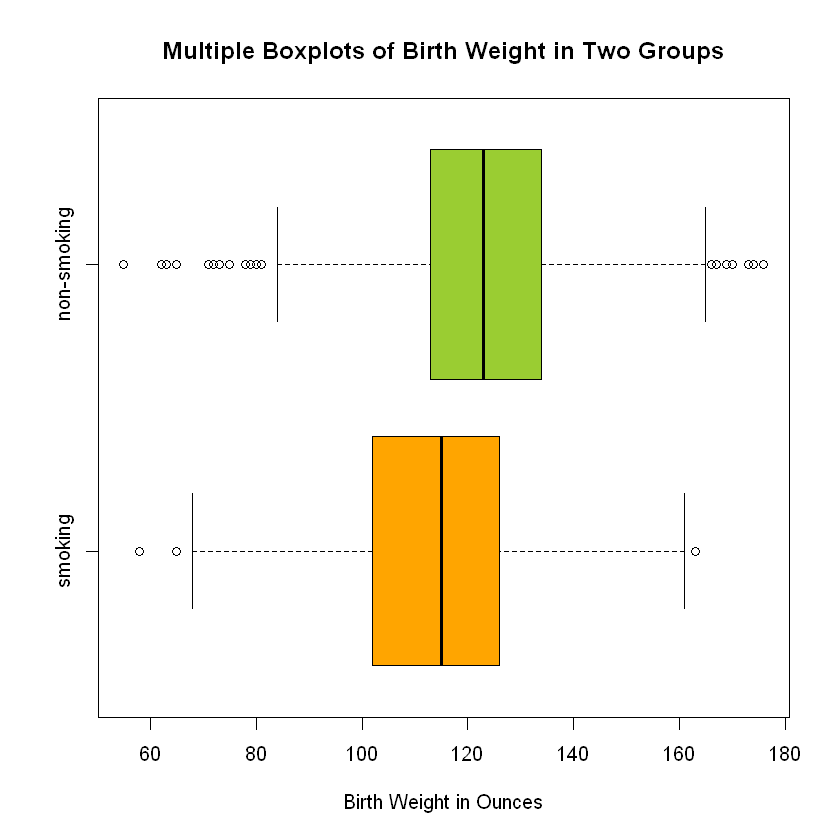

In [12]:
# put two boxplots in one plot for better comparison
boxplot(smoke$bwt, non_smoke$bwt, horizontal=TRUE,
        col = c('orange1', 'olivedrab3'),
       names = c('smoking', 'non-smoking'),
       main = 'Multiple Boxplots of Birth Weight in Two Groups',
       xlab = 'Birth Weight in Ounces')

#### Quantile-Quantile Plot

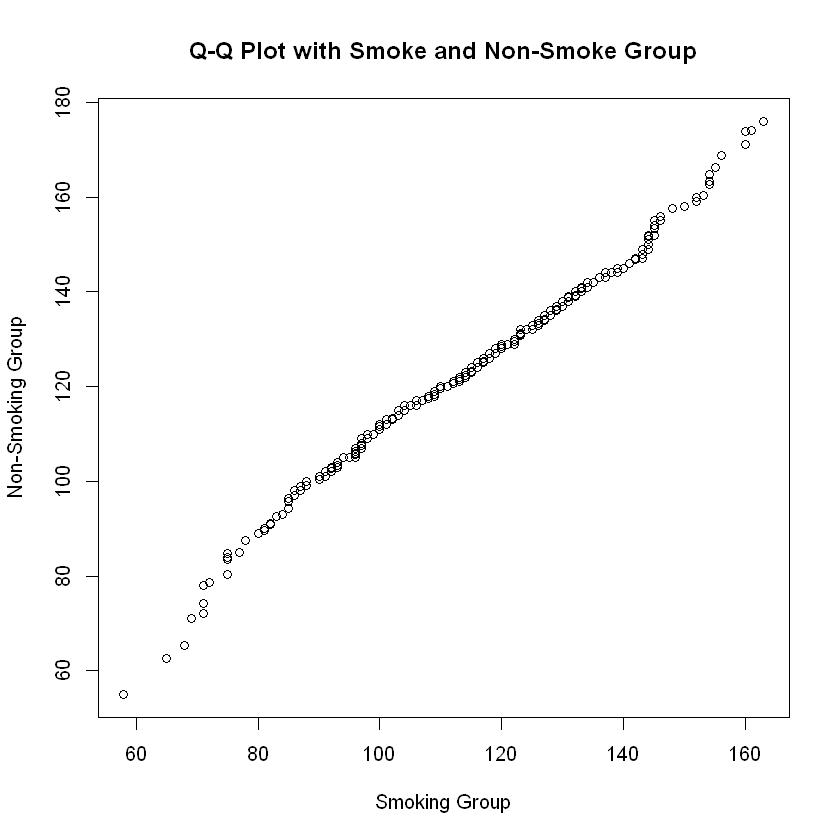

In [13]:
# qqplot for both groups
qqplot(smoke$bwt, non_smoke$bwt, xlab='Smoking Group', ylab='Non-Smoking Group', main='Q-Q Plot with Smoke and Non-Smoke Group')

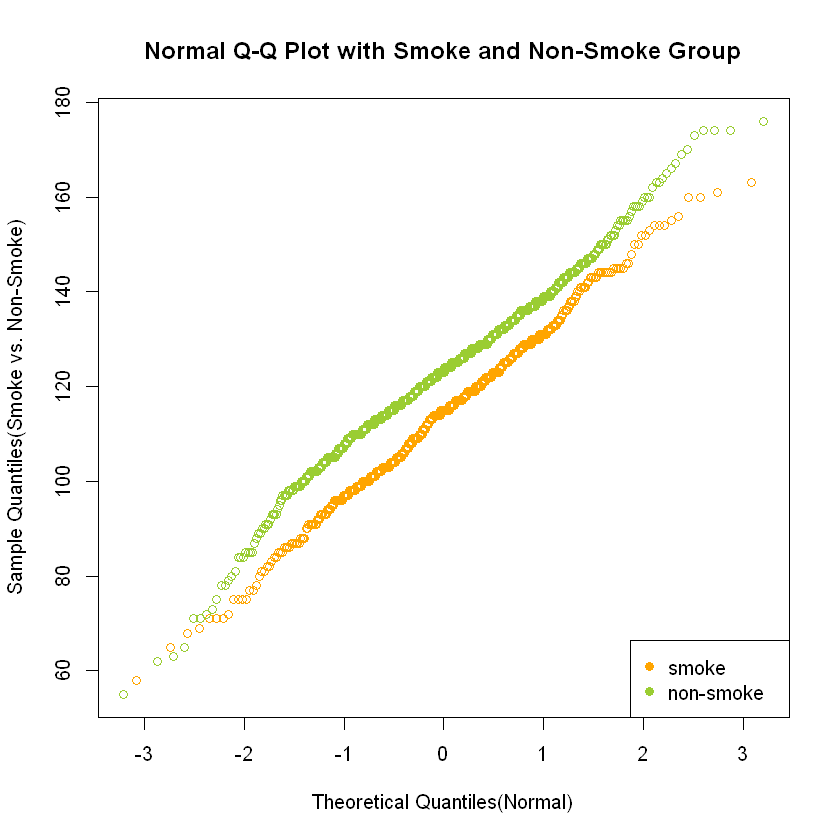

In [14]:
# plot the qqnorm for two groups
q1_s <- qqnorm(smoke$bwt, plot.it=FALSE)
q2_ns <- qqnorm(non_smoke$bwt, plot.it=FALSE)

# combine two qqnorm plots into one graph
plot(range(q1_s$x, q2_ns$x), range(q1_s$y, q2_ns$y), type='n', xlab='Theoretical Quantiles(Normal)',
    ylab='Sample Quantiles(Smoke vs. Non-Smoke)', main='Normal Q-Q Plot with Smoke and Non-Smoke Group')
# set the colors and legend for distinguish two groups
points(q1_s, col='orange1')
points(q2_ns, col='olivedrab3')
legend('bottomright', legend=c('smoke', 'non-smoke'), pch=16, col=c('orange1','olivedrab3'))

Conclusion: After plotting the histograms, box plots, and quantile-quantile plots of birth weight data for both groups, we have enhanced our knowledge toward the dataset. In conlusion, we found that the distributions of birth weight in two groups both have symmetric and unimodal shape, and these two groups of data which were extracted from the same dataset would both potentially have a normal distribution. By comparing their plots visually, we also found that the quartiles of birth weights in non-smoking group are roughly higher than smoking group, and the data from latter group is more spread than the former.

## Method 3

Compare the frequency, or incidence, of low-birth-weight babies for the two groups.

In [15]:
# read data and split group
df <- read.table("babies.txt", header = TRUE)
df <- subset(df, !(bwt==999 | gestation==999 | parity==9 | height==99 | weight==999))
smoke <- subset(df, smoke==1)
non_smoke <- subset(df, smoke==0)

# choose those babies who have low birth weight
low_weights_smoke <- subset(smoke, bwt < 88)
low_weights_Nonsmoke <- subset(non_smoke, bwt < 88)

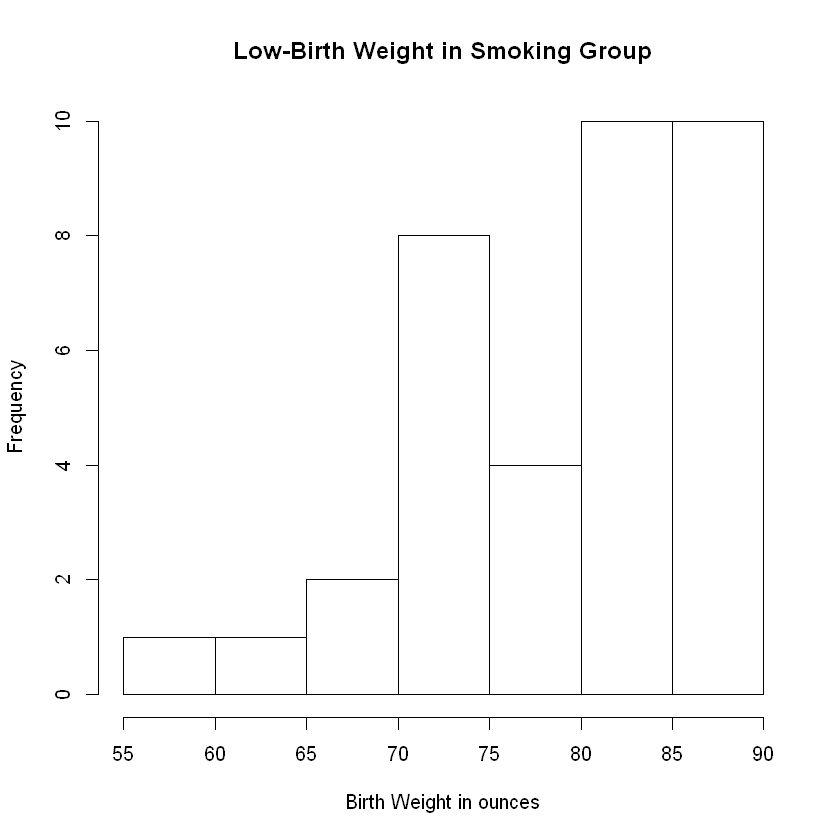

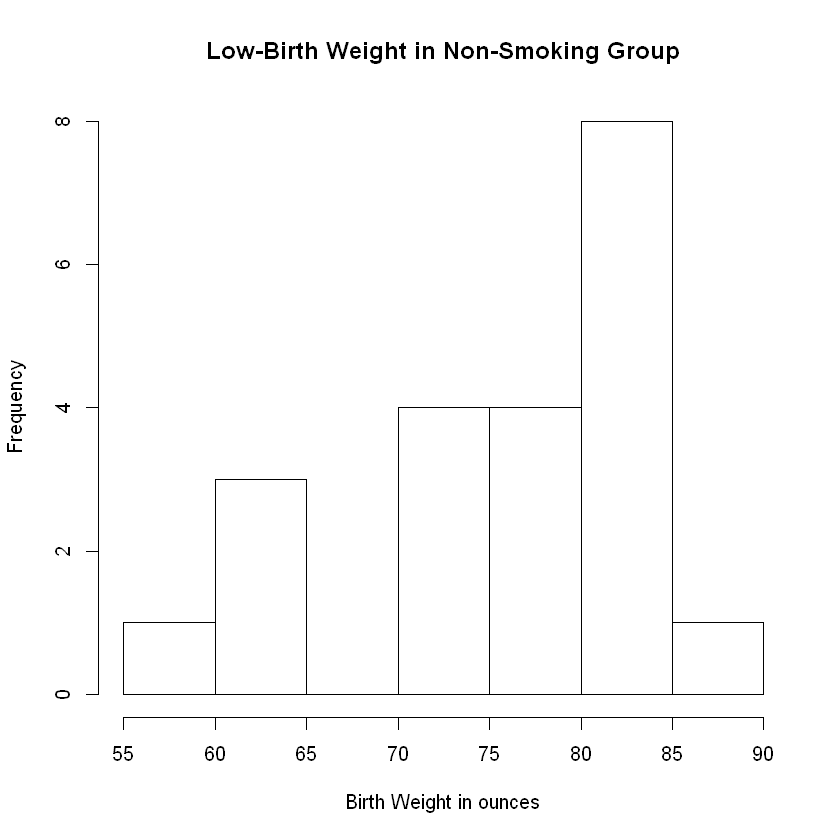

In [16]:
# plot histogram
hist(low_weights_smoke$bwt, main='Low-Birth Weight in Smoking Group',xlab='Birth Weight in ounces')
hist(low_weights_Nonsmoke$bwt, main='Low-Birth Weight in Non-Smoking Group',xlab='Birth Weight in ounces')

First, we try increse the boundry of low-birth weight to 100 pounds, which means there will be more low-weight-baby

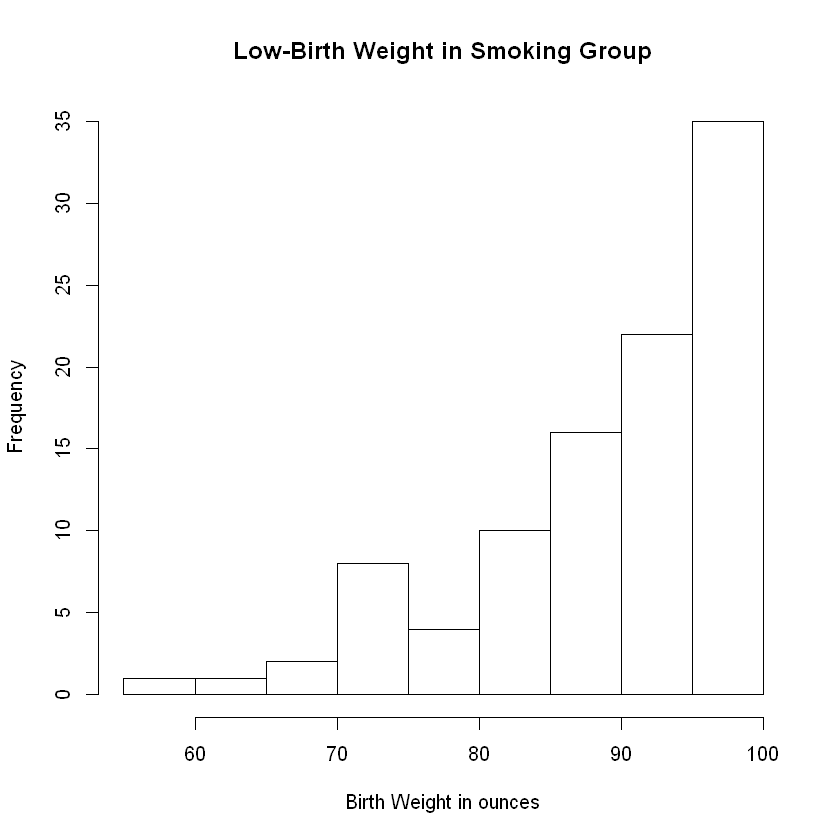

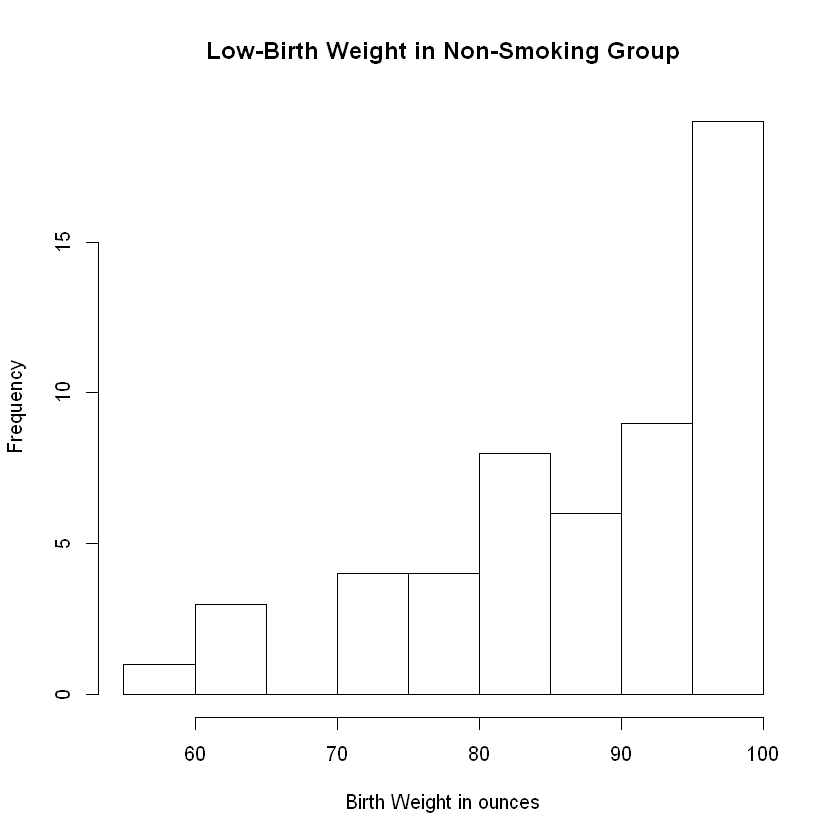

In [17]:
# draw out hist for both group if increase the boundary
low_weights_smoke <- subset(smoke, bwt < 100)
hist(low_weights_smoke$bwt, main='Low-Birth Weight in Smoking Group',xlab='Birth Weight in ounces')

low_weights_Nonsmoke <- subset(non_smoke, bwt < 100)
hist(low_weights_Nonsmoke$bwt, main='Low-Birth Weight in Non-Smoking Group',xlab='Birth Weight in ounces')

Now, What if we decrease the boundry of low-birth weight to 75 pounds, which means there will be less low-weight-baby ?

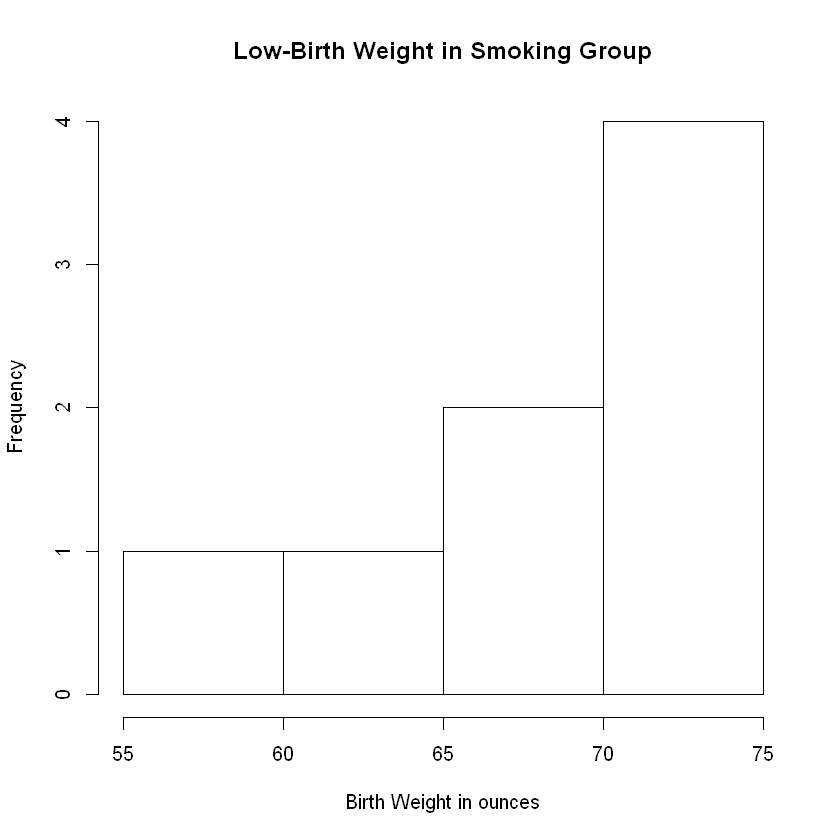

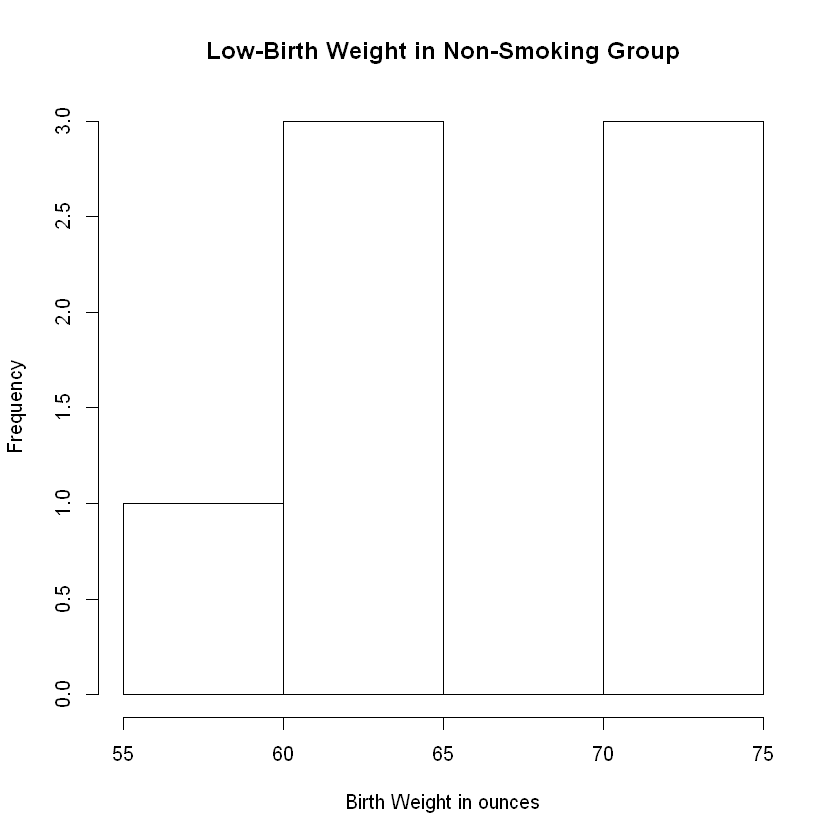

In [18]:
# draw out the histogram for both groups if decrease boundary
low_weights_smoke <- subset(smoke, bwt < 75)
hist(low_weights_smoke$bwt, main='Low-Birth Weight in Smoking Group',xlab='Birth Weight in ounces')

low_weights_Nonsmoke <- subset(non_smoke, bwt < 75)
hist(low_weights_Nonsmoke$bwt, main='Low-Birth Weight in Non-Smoking Group',xlab='Birth Weight in ounces')

Conclusion: Low-weight-babies in the smoking group have a better left skewed distribution than those in Non-smoking group. The smoking group contains more low-weight babies than the smoking group.

## Method 4

Advanced Analysis: use 2-d histogram graph to analyze the birth weight and gestation days.

In [19]:
# extract the birth weight and gestation variable from each class
smoke_bwt <- smoke[c('bwt', 'gestation')]
non_smoke_bwt <- non_smoke[c('bwt', 'gestation')]

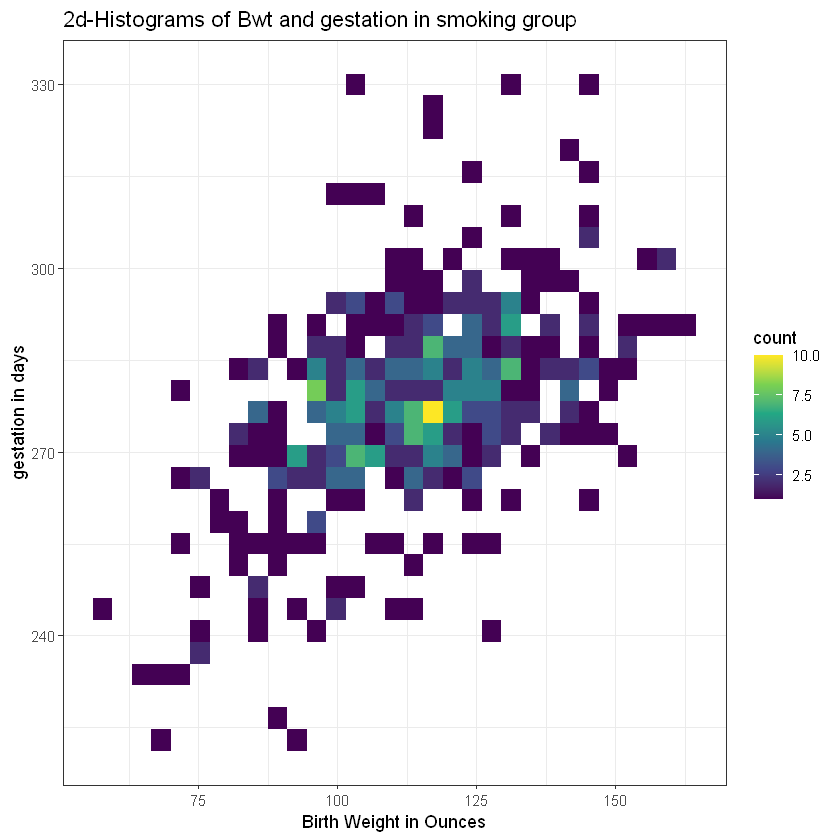

In [20]:
# draw the 2-d histogram for smoking group
ggplot(smoke_bwt, aes(x=bwt, y=gestation) ) +
  geom_bin2d() +
  scale_fill_continuous(type = "viridis")+
  ggtitle('2d-Histograms of Bwt and gestation in smoking group')+
  xlab('Birth Weight in Ounces')+
  ylab('gestation in days')+
  theme_bw()

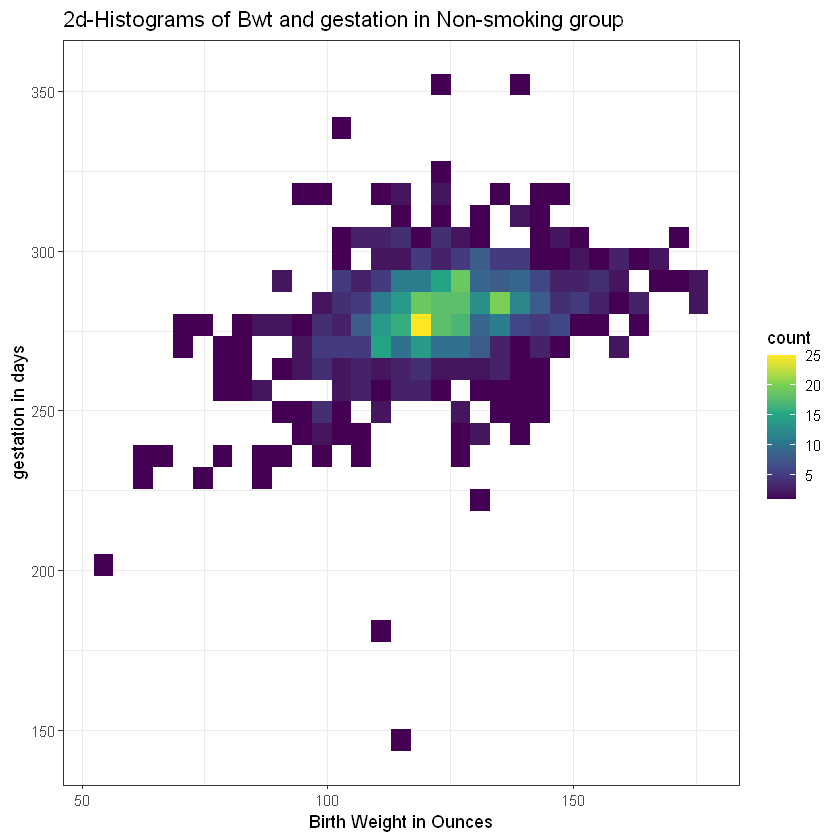

In [21]:
# draw the 2-d histogram for non-smoking group
ggplot(non_smoke_bwt, aes(x=bwt, y=gestation) ) +
  geom_bin2d() +
  scale_fill_continuous(type = "viridis")+
  ggtitle('2d-Histograms of Bwt and gestation in Non-smoking group')+
  xlab('Birth Weight in Ounces')+
  ylab('gestation in days')+
  theme_bw()

Conclusion: As we can see from the 2d histogram graph, it is obvious that the smoking group contains more babies that are both low-weight and early born. Since babies that are both low-weight and early born have lower survival rates, the babies born by smoking mothers are more likely to have lower survival rates than those of non-smoking. 